In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

In [28]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [31]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [32]:
#df.columns = [columns.strip() for colummns in df.columns]

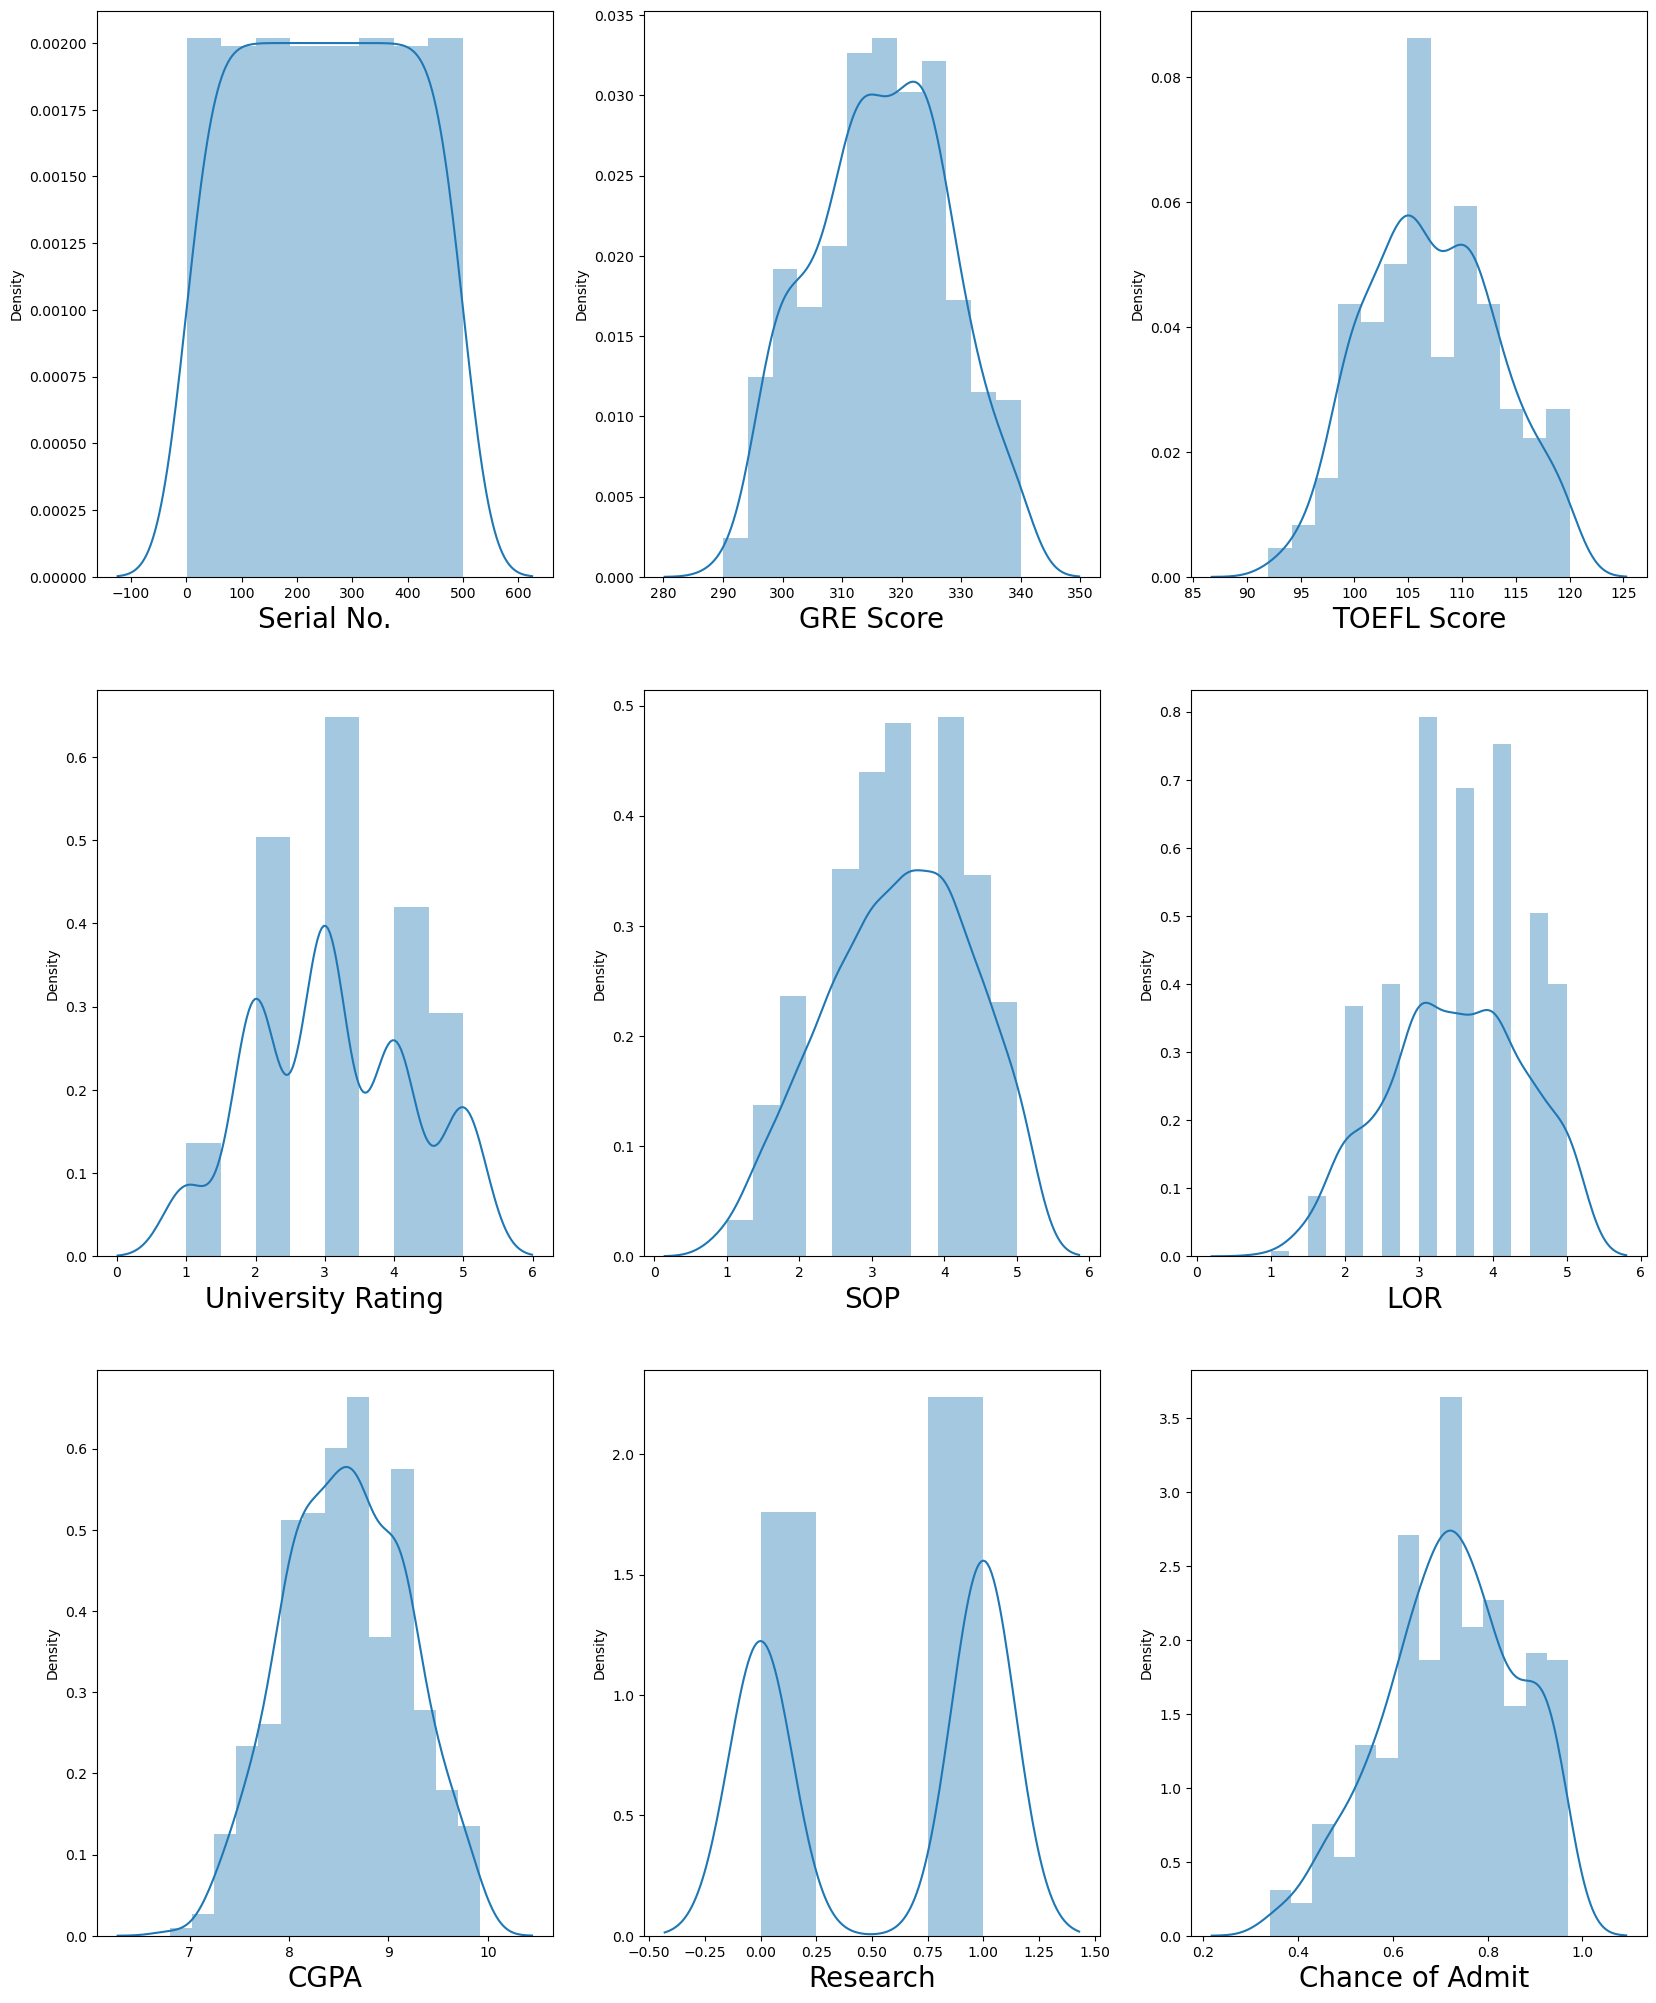

In [33]:
# To check the distribution 

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for columns in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns, fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot: >

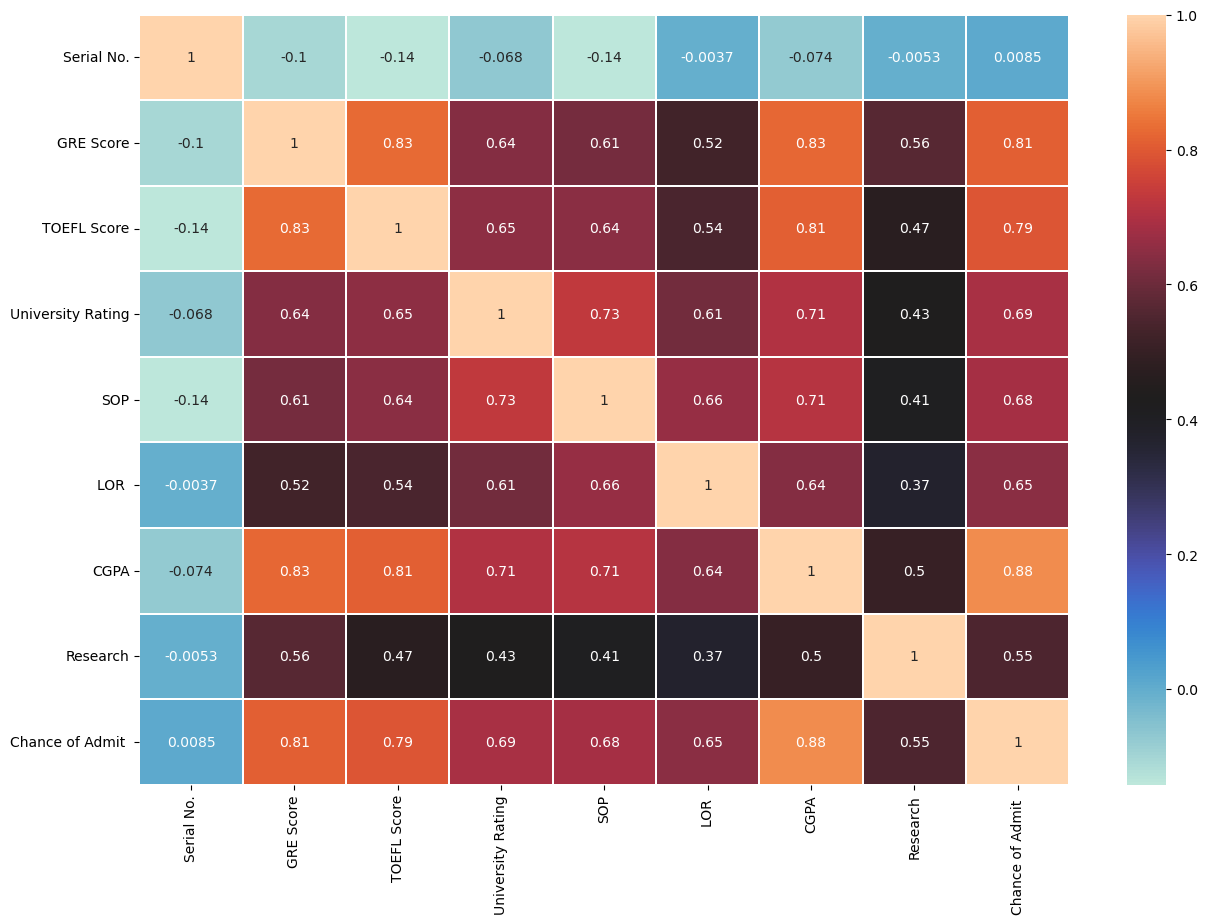

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='icefire', linewidths=0.2)

In [36]:
### Input features

X = df.drop('Chance of Admit ', axis=1)
X

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [38]:
# Output label

y = df['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [39]:
## Splitting the data set

from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=34)

In [41]:
X_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
162,163,318,109,3,3.0,3.0,8.50,0
266,267,312,105,2,2.0,2.5,8.45,0
237,238,329,114,5,4.5,5.0,9.19,1
170,171,312,101,2,2.5,3.5,8.04,1
441,442,332,112,1,1.5,3.0,8.66,1
...,...,...,...,...,...,...,...,...
246,247,316,105,3,3.0,3.5,8.73,0
361,362,334,116,4,4.0,3.5,9.54,1
490,491,307,105,2,2.5,4.5,8.12,1
122,123,310,106,4,1.5,2.5,8.36,0


In [43]:
## Scaling dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
X_train_tf = scaler.fit_transform(X_train)

In [ ]:
### Model training

In [46]:
from sklearn.svm import SVR
model = SVR()

In [47]:
model.fit(X_train_tf, y_train)

SVR()

In [48]:
model.score(X_train_tf, y_train)

0.800222175878852

## Testing

In [50]:
X_test_tf = scaler.transform(X_test)

In [52]:
y_predict = model.predict(X_test_tf)
y_predict

array([0.6644052 , 0.74944474, 0.88217959, 0.764696  , 0.59837132,
       0.70582928, 0.57308275, 0.73054176, 0.5815279 , 0.83008059,
       0.63493971, 0.86260189, 0.55085912, 0.68790028, 0.6866379 ,
       0.70267519, 0.87728371, 0.86312972, 0.89485251, 0.76606794,
       0.87461934, 0.61083124, 0.60298236, 0.74349795, 0.55259887,
       0.8294616 , 0.69948743, 0.8470191 , 0.74702738, 0.75783745,
       0.79338643, 0.76887455, 0.69221295, 0.8508666 , 0.58745235,
       0.82454312, 0.59166587, 0.49631241, 0.67155072, 0.49484269,
       0.49755394, 0.70678518, 0.8553813 , 0.60994685, 0.62478507,
       0.68562234, 0.59195494, 0.74542493, 0.71991364, 0.70009798,
       0.73820167, 0.75435447, 0.87673113, 0.76448754, 0.64102203,
       0.88193139, 0.87332038, 0.59100218, 0.53575039, 0.74955094,
       0.70973732, 0.65588611, 0.48340561, 0.63289021, 0.51660683,
       0.89064795, 0.53318599, 0.52144719, 0.66576676, 0.9038471 ,
       0.74163041, 0.60334245, 0.48919165, 0.52203056, 0.69414

#### Accuracy of the model

In [54]:
# Using r-squared

from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
score

0.7738944425297033

In [55]:
## Using adjusted r-squared

adj_r2 = 1 - (1-score)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
adj_r2

0.7702104415933237

Observation :
